In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud


In [4]:
#  Definir la ruta base de los archivos
# Asegúrate de cambiar esta ruta si el dataset está en otra ubicación
RUTA_BASE = "C:/Users/oscar/Desktop/Henry/Proyectos/INDIVIDUAL 1/data_set"

In [5]:
#  Cargar el dataset final en formato Parquet
ruta_final_parquet = os.path.join(RUTA_BASE, "movies_final.parquet")
movies_df = pd.read_parquet(ruta_final_parquet)


In [6]:
#  Ver la estructura del dataset para entender los datos
print("Información del dataset:")
print(movies_df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44907 entries, 0 to 44906
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  3151 non-null   object        
 1   budget                 44907 non-null  int64         
 2   genres                 44907 non-null  object        
 3   id                     44907 non-null  int64         
 4   original_language      44897 non-null  object        
 5   overview               44000 non-null  object        
 6   popularity             44907 non-null  object        
 7   production_companies   44426 non-null  object        
 8   production_countries   44902 non-null  object        
 9   release_date           44907 non-null  datetime64[ns]
 10  revenue                44907 non-null  float64       
 11  runtime                44667 non-null  float64       
 12  spoken_languages       44881 non-nu

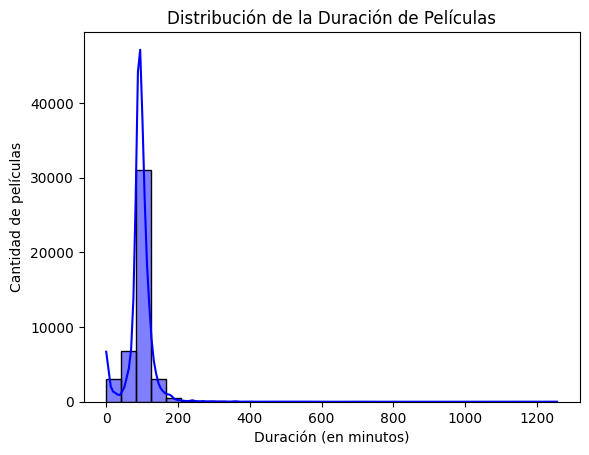

In [7]:
#  Análisis de la distribución de la duración de las películas
duracion = movies_df['runtime'].dropna()
sns.histplot(duracion, bins=30, kde=True, color='blue')
plt.xlabel('Duración (en minutos)')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de la Duración de Películas')
plt.show()

In [8]:
# Manejo de valores nulos en duración
mediana = int(movies_df['runtime'].median())
movies_df['runtime'] = movies_df['runtime'].fillna(mediana)
movies_df['runtime'] = movies_df['runtime'].replace(0, mediana)

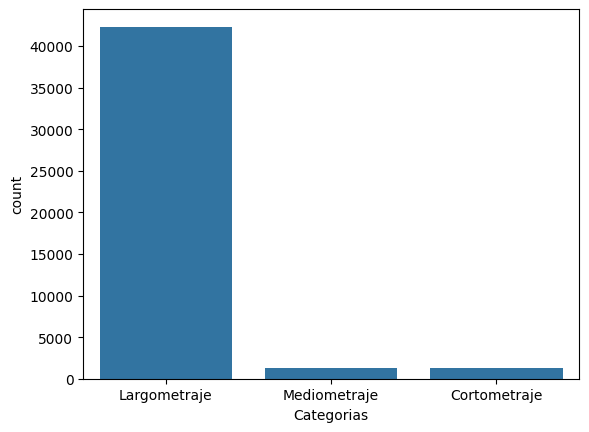

In [9]:
# Categorizar películas según duración
condicion = [(movies_df['runtime'] < 30),
             (movies_df['runtime'] >= 30) & (movies_df['runtime'] <= 60),
             (movies_df['runtime'] > 60)]
eleccion = ['Cortometraje', 'Mediometraje', 'Largometraje']
movies_df['runtime_category'] = np.select(condicion, eleccion, default='Desconocido')
sns.countplot(data=movies_df, x='runtime_category')
plt.xlabel('Categorias')
plt.show()

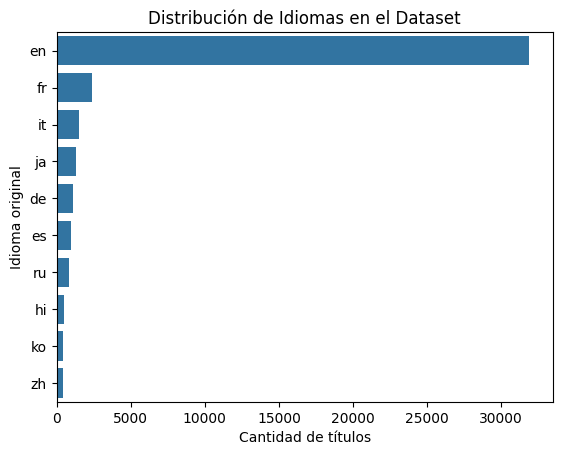

In [ ]:
#  Distribución de idiomas principales
sns.countplot(y=movies_df['original_language'], order=movies_df['original_language'].value_counts().index[:10])
plt.xlabel('Cantidad de títulos')
plt.ylabel('Idioma original')
plt.title('Distribución de Idiomas en el Dataset')
plt.show()

In [12]:
# Mapear códigos de idioma a nombres completos
idiomas_mapeo = { "en": "Inglés", "fr": "Francés", "it": "Italiano", "de": "Alemán", "ja": "Japones"
}
movies_df['original_language'] = movies_df['original_language'].map(idiomas_mapeo).fillna(movies_df['original_language'])
print(f"Los principales idiomas en el dataset son:\n{movies_df['original_language'].value_counts().head().to_string()}")


Los principales idiomas en el dataset son:
original_language
Inglés      31876
Francés      2415
Italiano     1510
Japones      1339
Alemán       1071


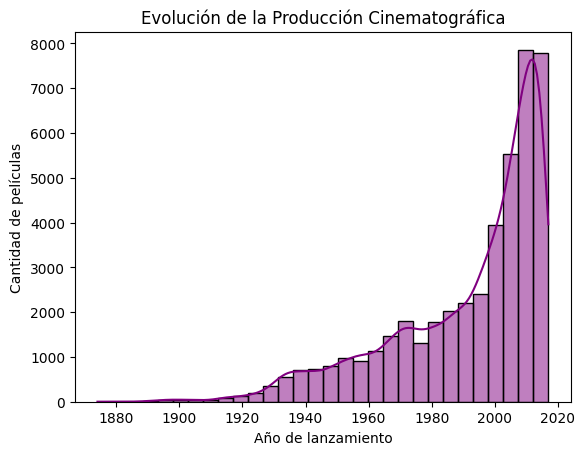

Año de la película más nueva: 2017
Año de la película más antigua en el dataset: 1874


In [ ]:
# Análisis de evolución de la producción cinematográfica
sns.histplot(movies_df['release_year'].dropna(), bins=30, kde=True, color='purple')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de películas')
plt.title('Evolución de la Producción Cinematográfica')
plt.show()
print(f"Año de la película más nueva: {movies_df['release_year'].max()}")
print(f"Año de la película más antigua en el dataset: {movies_df['release_year'].min()}")

In [13]:
print("1975 se constituye como el año de la llegada del blockbuster moderno, marcando un punto" 
"de inflexión en la industria del cine. Basándonos en la gráfica y este acontecimiento clave se puede"
"filtrar el dataset a partir de 1975. Esto optimiza el modelo para su despliegue en Render y" 
"captura un punto de inflexión clave en la historia del cine y sus datos.")
# Filtrar películas a partir de 1975 por optimización
movies_df = movies_df[movies_df['release_year'] > 1975]


1975 se constituye como el año de la llegada del blockbuster moderno, marcando un puntode inflexión en la industria del cine. Basándonos en la gráfica y este acontecimiento clave se puedefiltrar el dataset a partir de 1975. Esto optimiza el modelo para su despliegue en Render ycaptura un punto de inflexión clave en la historia del cine y sus datos.


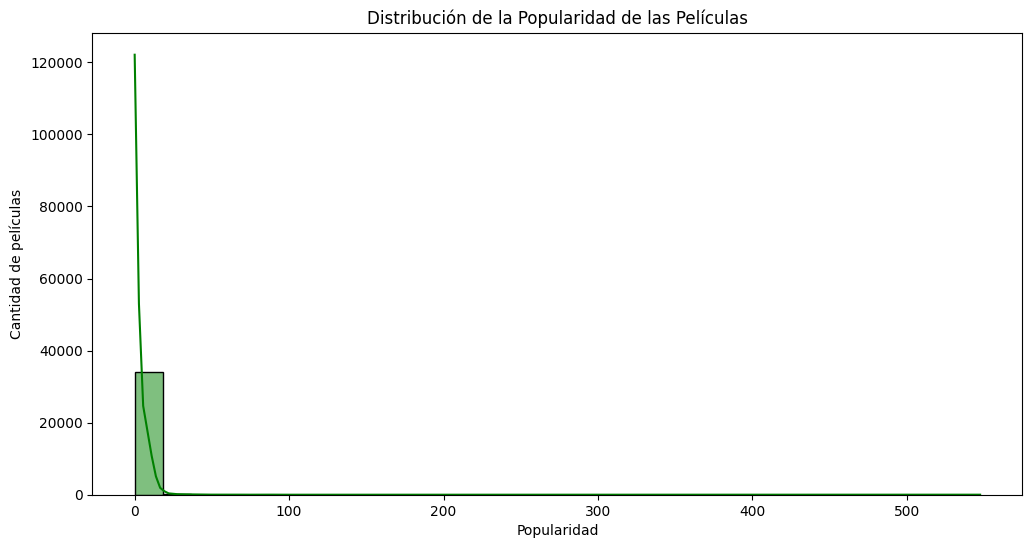

In [17]:
# Distribución de popularidad de las películas
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(movies_df['popularity'].dropna(), bins=30, kde=True, color='green')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de la Popularidad de las Películas')
plt.show()




C:\Users\oscar\AppData\Local\Temp\ipykernel_21820\1860256339.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts['genre'][:10], x=genre_counts['count'][:10], palette='viridis')


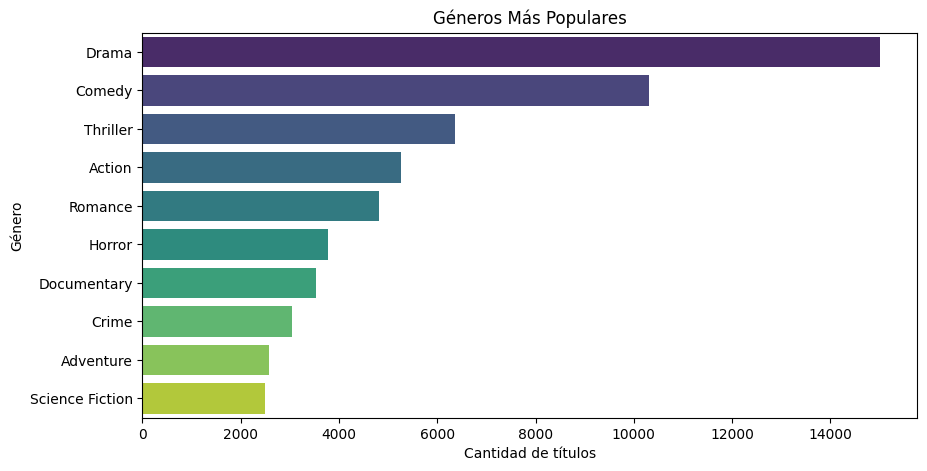

In [18]:
# Análisis de géneros más populares
genres_exploded = movies_df['genres'].dropna().str.split(', ').explode()

# Crear un DataFrame con el conteo de géneros
genre_counts = genres_exploded.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Gráfica corregida con sns.barplot()
plt.figure(figsize=(10, 5))
sns.barplot(y=genre_counts['genre'][:10], x=genre_counts['count'][:10], palette='viridis')
plt.xlabel('Cantidad de títulos')
plt.ylabel('Género')
plt.title('Géneros Más Populares')
plt.show()



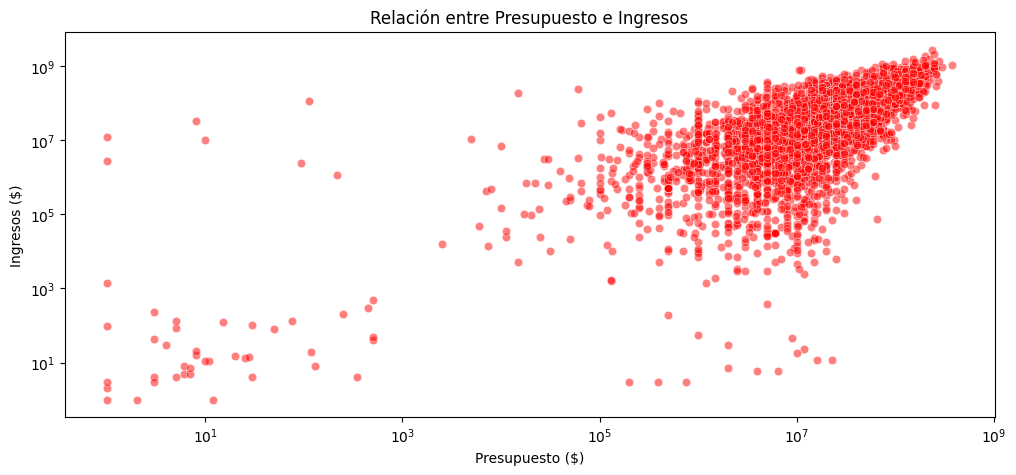

In [19]:
# Relación Entre Presupuesto, Ingresos y Éxito de la Película
plt.figure(figsize=(12, 5))
sns.scatterplot(x=movies_df['budget'], y=movies_df['revenue'], alpha=0.5, color='red')
plt.xlabel('Presupuesto ($)')
plt.ylabel('Ingresos ($)')
plt.title('Relación entre Presupuesto e Ingresos')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [20]:
# Transformaciones para optimización del modelo
movies_df['log_vote_count'] = np.log1p(movies_df['vote_count'])
movies_df['log_popularity'] = np.log1p(movies_df['popularity'].fillna(0))
movies_df['log_revenue'] = np.log1p(movies_df['revenue'])

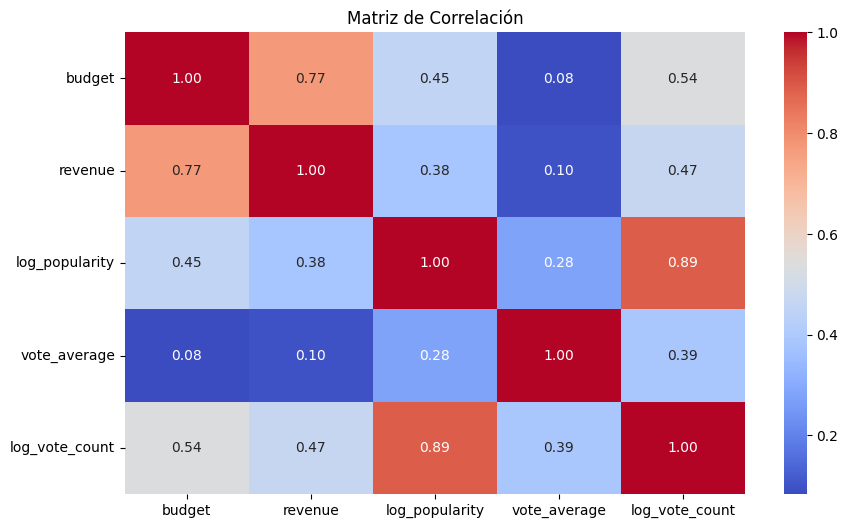

In [21]:
#  Matriz de correlación para entender relaciones entre variables
plt.figure(figsize=(10, 6))
sns.heatmap(movies_df[['budget', 'revenue', 'log_popularity', 'vote_average', 'log_vote_count']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [28]:
"""El presupuesto tiene impacto en los ingresos, pero no necesariamente en la calificación promedio"""


'El presupuesto tiene impacto en los ingresos, pero no necesariamente en la calificación promedio'

In [27]:
"""La popularidad y el número de votos tienen una fuerte relación, lo que significa que las películas populares tienden a recibir más interacciones."""

'La popularidad y el número de votos tienen una fuerte relación, lo que significa que las películas populares tienden a recibir más interacciones.'

In [26]:
"""Las películas con mayor presupuesto suelen tener más votos y generar más ingresos, pero su calidad (según la puntuación promedio) no está directamente relacionada con el dinero invertido."""

'Las películas con mayor presupuesto suelen tener más votos y generar más ingresos, pero su calidad (según la puntuación promedio) no está directamente relacionada con el dinero invertido.'

In [29]:
print(" Análisis exploratorio completado.")

 Análisis exploratorio completado.
